# Import Dataset

In [219]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import glob
from PIL import Image
from scipy.signal import butter, lfilter

from keras.datasets import  mnist
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout


(x_train, y_train), (x_test, y_test)  =  mnist.load_data()

# Dataset Size

In [220]:
print("Size fo X Train: ", x_train.shape)
print("Size fo Y Train: ", y_train.shape)
print("Size fo X Test: ", x_test.shape)
print("Size fo Y Test: ", y_test.shape)

Size fo X Train:  (60000, 28, 28)
Size fo Y Train:  (60000,)
Size fo X Test:  (10000, 28, 28)
Size fo Y Test:  (10000,)


# Sample image 

Text(0.5, 1.0, 'Sample image')

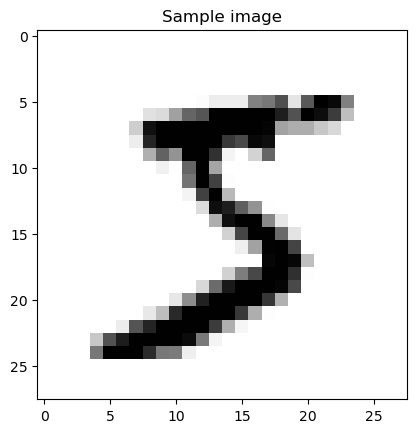

In [221]:
plt.imshow(x_train[0], cmap='binary')
plt.title("Sample image")

# Pre-Processing

Text(0.5, 1.0, 'Sample image')

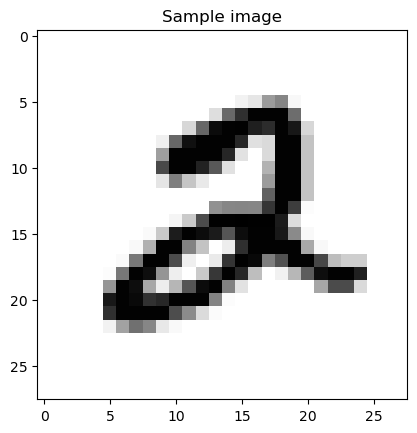

In [344]:
# Take a sample grayscale image
all_types_of_images = [1,3,5,7,2,0,13,15,17,4]
# grayscale_image = x_train[1]  # ==> 0
# grayscale_image = x_train[3]  # ==> 1
# grayscale_image = x_train[5]  # ==> 2
# grayscale_image = x_train[7]  # ==> 3
# grayscale_image = x_train[2]  # ==> 4
# grayscale_image = x_train[0]  # ==> 5 
# grayscale_image = x_train[13]  # ==> 6
# grayscale_image = x_train[15]  # ==> 7
# grayscale_image = x_train[17]  # ==> 8
# grayscale_image = x_train[4]  # ==> 9



plt.imshow(grayscale_image, cmap='binary')
plt.title("Sample image")

In [ ]:
def invert_colors(grayscale_image):
    inverted_image = cv2.bitwise_not(grayscale_image)
    
    # Display the original and inverted images
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(inverted_image, cmap='gray')
    plt.title('Inverted Image')

    plt.tight_layout()
    plt.show()
    return inverted_image

# Example usage:
# grayscale_image = invert_colors(grayscale_image)

# Histogram

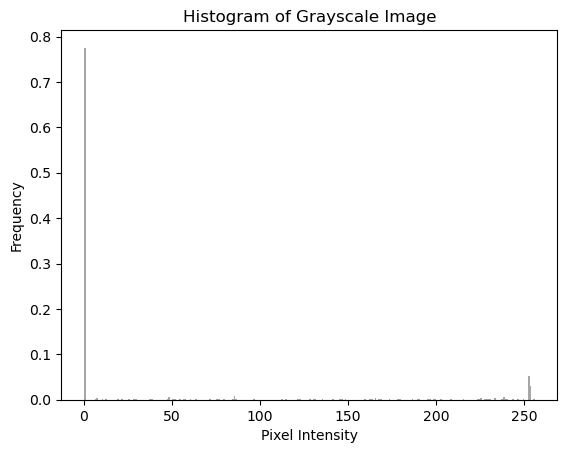

In [223]:
# Flatten the image array for histogram plotting
pixels = grayscale_image.flatten()

# Plot the histogram
plt.hist(pixels, bins=256, range=[0, 256], density=True, color='gray', alpha=0.7)
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


# Average Smoothing Image

kernel =  [[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


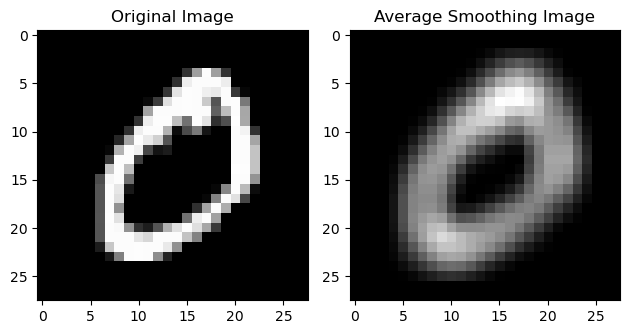

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          2,   8,  19,  25,  27,  25,  18,   8,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
         13,  30,  50,  67,  76,  65,  48,  28,  11,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,  13,
         35,  61,  91, 115, 125, 106,  80,  50,  24,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  14,  35,
         67, 103, 138, 156, 167, 148, 116,  78,  49,  18,   5,   0,   0,
          0,   0],
       [  

In [224]:
def Average_Filter(grayscale_image, kernel_size):

    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    print("kernel = ", kernel)
    smoothed_image = cv2.filter2D(grayscale_image, -1, kernel)

    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(smoothed_image, cmap='gray')
    plt.title('Average Smoothing Image')

    plt.tight_layout()
    plt.show()
    return smoothed_image

kernel_size = 5
Average_Filter(grayscale_image, kernel_size)

# median Filter

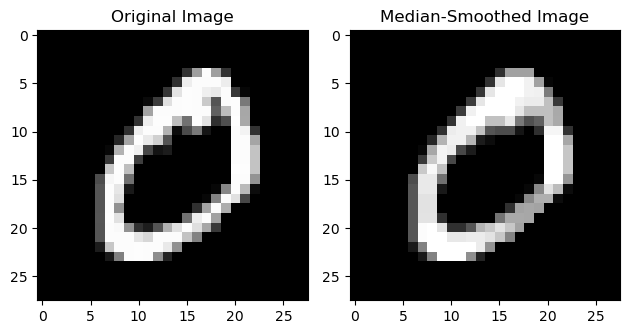

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  48, 159, 159, 159,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  51, 227, 252, 252, 239, 159,   6,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [225]:
def median_Filter(grayscale_image, kernel_size ):
    median_smoothed_image = cv2.medianBlur(grayscale_image, kernel_size)

    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(median_smoothed_image, cmap='gray')
    plt.title('Median-Smoothed Image')

    plt.tight_layout()
    plt.show()
    return median_smoothed_image
kernel_size = 3
median_Filter(grayscale_image, kernel_size)

# Gaussian Filter 

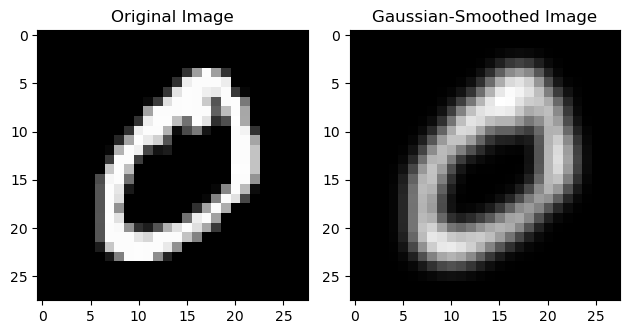

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   5,   9,  11,   9,   5,   1,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          2,  12,  30,  51,  61,  51,  29,  10,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
         14,  43,  88, 129, 145, 127,  81,  33,   7,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  14,
         45, 100, 160, 201, 212, 192, 139,  71,  22,   4,   1,   0,   0,
          0,   0],
       [  

In [226]:
def Gaussian_Filter(grayscale_image, kernel_size):
    gaussian_smoothed_image = cv2.GaussianBlur(grayscale_image, kernel_size, sigmaX=0)

    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(gaussian_smoothed_image, cmap='gray')
    plt.title('Gaussian-Smoothed Image')

    plt.tight_layout()
    plt.show()
    return gaussian_smoothed_image
kernel_size = (5, 5)
Gaussian_Filter(grayscale_image, kernel_size)

# Laplacian Filter

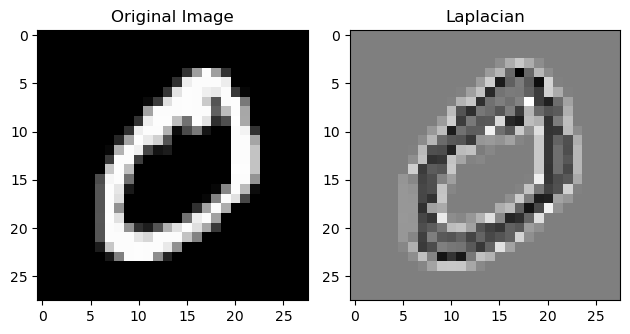

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,   51.,  159.,  253.,
         159.,   50.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.

In [227]:
def Laplacian_Filter(grayscale_image): 
    result_image = cv2.Laplacian(grayscale_image, cv2.CV_64F)
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(result_image, cmap='gray')
    plt.title('Laplacian')
    plt.tight_layout()
    plt.show()
    return result_image

Laplacian_Filter(grayscale_image)

# Low-Pass Filter

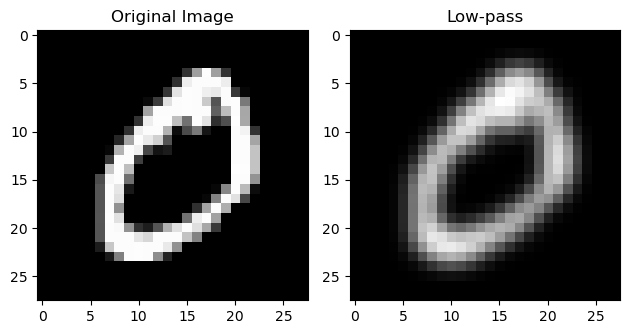

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   5,   9,  11,   9,   5,   1,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          2,  12,  30,  51,  61,  51,  29,  10,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
         14,  43,  88, 129, 145, 127,  81,  33,   7,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  14,
         45, 100, 160, 201, 212, 192, 139,  71,  22,   4,   1,   0,   0,
          0,   0],
       [  

In [228]:
def Low_pass(grayscale_image):
    result_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)

    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(result_image, cmap='gray')
    plt.title('Low-pass')
    plt.tight_layout()
    plt.show()
    return result_image

Low_pass(grayscale_image)

# High-pass Filter

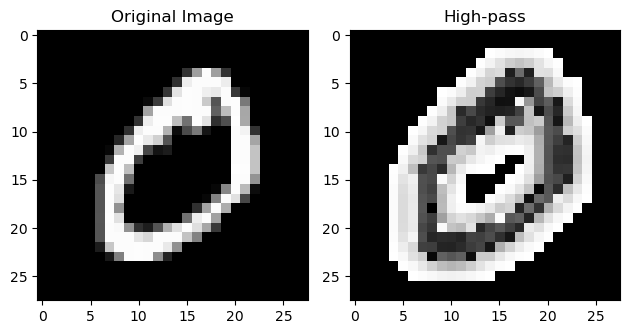

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255, 251, 247, 245, 247, 251, 255,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        254, 244, 226, 205, 195, 205, 227, 246, 254,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 254,
        242, 213, 219,  30, 108,  32, 225, 223, 249,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 253, 242,
        211, 204,  78,  51,  40,  60,  98, 185, 234, 252, 255,   0,   0,
          0,   0],
       [  

In [270]:
def High_pass(grayscale_image):
    low_pass = cv2.GaussianBlur(grayscale_image, (5, 5), 0)
    result_image = grayscale_image - low_pass


    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(result_image, cmap='gray')
    plt.title('High-pass')
    plt.tight_layout()
    plt.show()
    return result_image
High_pass(grayscale_image)

# Image restoration techniques

## restoration_Mean_Filter

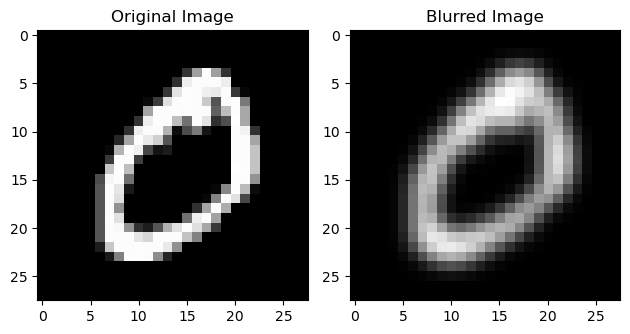

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   5,   9,  11,   9,   5,   1,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          2,  12,  30,  51,  61,  51,  29,  10,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
         14,  43,  88, 129, 145, 127,  81,  33,   7,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  14,
         45, 100, 160, 201, 212, 192, 139,  71,  22,   4,   1,   0,   0,
          0,   0],
       [  

In [230]:
def restoration_Mean_Filter(grayscale_image):
    blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(blurred_image, cmap='gray')
    plt.title('Blurred Image')
    plt.tight_layout()
    plt.show()
    return blurred_image
# Example usage:
restoration_Mean_Filter(grayscale_image)



## restoration_Harmonic_Mean_Filter

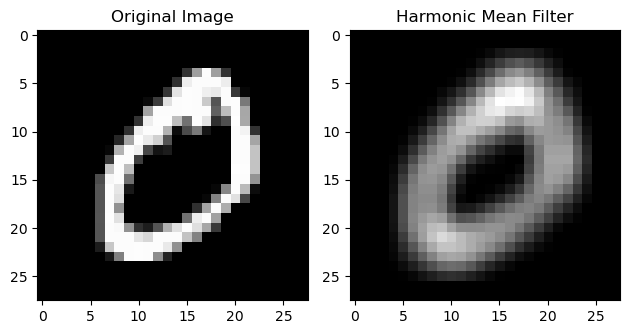

In [231]:
def restoration_Harmonic_Mean_Filter(grayscale_image):
    harmonic_mean_image = cv2.filter2D(grayscale_image, -1, np.ones((5, 5), dtype=np.float32) / 25)
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(harmonic_mean_image, cmap='gray')
    plt.title('Harmonic Mean Filter')
    plt.tight_layout()
    plt.show()
restoration_Harmonic_Mean_Filter(grayscale_image)

## restoration_Contraharmonic_Mean_Filter

/tmp/ipykernel_34580/2000830794.py:2: RuntimeWarning: invalid value encountered in divide
  contraharmonic_mean_image = cv2.filter2D(grayscale_image, -1, np.power(grayscale_image, Q+1) / np.power(grayscale_image, Q))


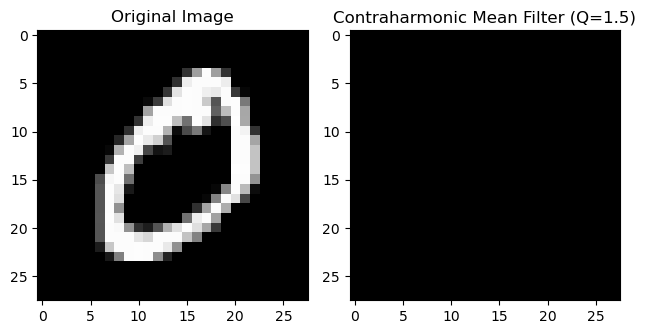

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 

In [232]:
def restoration_Contraharmonic_Mean_Filter(grayscale_image, Q):
    contraharmonic_mean_image = cv2.filter2D(grayscale_image, -1, np.power(grayscale_image, Q+1) / np.power(grayscale_image, Q))
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(contraharmonic_mean_image, cmap='gray')
    plt.title(f'Contraharmonic Mean Filter (Q={Q})')
    plt.tight_layout()
    plt.show()
    return contraharmonic_mean_image
restoration_Contraharmonic_Mean_Filter(grayscale_image, Q=1.5)


In [233]:

ksize = 5

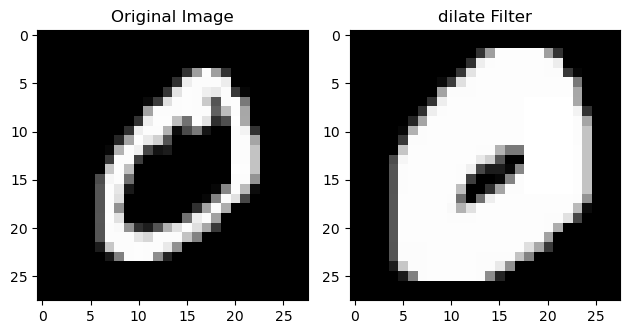

In [234]:
filtered_image = cv2.dilate(grayscale_image, np.ones((ksize, ksize), dtype=np.uint8))
plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('dilate Filter')
plt.tight_layout()
plt.show()




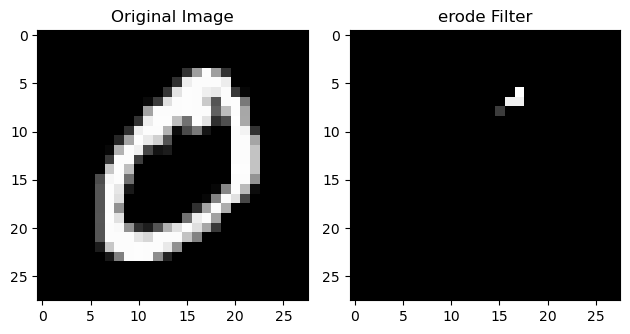

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, 50,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        47, 47,  0,  0,  

In [235]:
def erode(grayscale_image):
    filtered_image = cv2.erode(grayscale_image, np.ones((ksize, ksize), dtype=np.uint8))
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('erode Filter')
    plt.tight_layout()
    plt.show()
    return filtered_image
erode(grayscale_image)

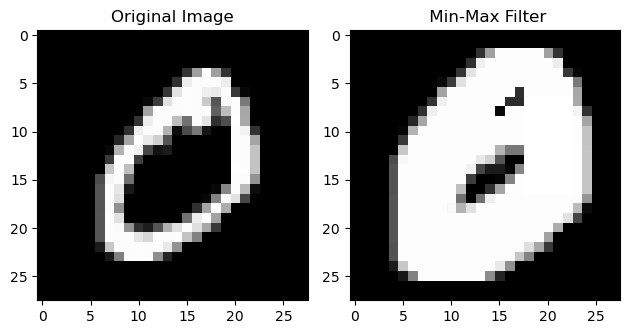

In [276]:
def Min_Max_Filter(grayscale_image):
    min_filtered = cv2.erode(grayscale_image, np.ones((ksize, ksize), dtype=np.uint8))
    max_filtered = cv2.dilate(grayscale_image, np.ones((ksize, ksize), dtype=np.uint8))
    filtered_image = (min_filtered + max_filtered) // 2
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(' Min-Max Filter')
    plt.tight_layout()
    plt.show()
Min_Max_Filter(grayscale_image)

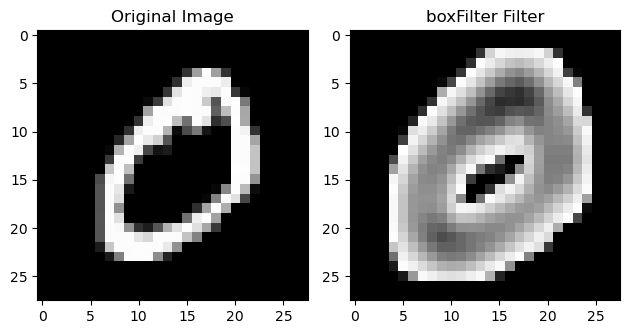

In [237]:
filtered_image = cv2.boxFilter(grayscale_image, -1, (ksize, ksize), normalize=False)
filtered_image = filtered_image - cv2.boxFilter(grayscale_image, -1, (ksize, ksize), normalize=True)
plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('boxFilter Filter')
plt.tight_layout()
plt.show()

# Otsu's Method for image thresholding

1. **Binary Thresholding:**

2. **Inverse Binary Thresholding:**

3. **Truncated Thresholding:**

4. **To-Zero Thresholding:**

5. **To-Zero Inverted Thresholding:**

6. **Adaptive Thresholding:**

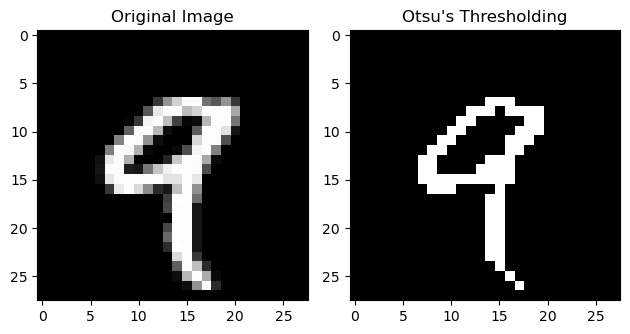

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [215]:

def Binary_Thresholding(grayscale_image):
    # Apply Otsu's method for thresholding
    _, binary_thresholded_image = cv2.threshold(grayscale_image, 200, 255, cv2.THRESH_BINARY)

    # Display the original and thresholded images
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(binary_thresholded_image, cmap='gray')
    plt.title('Otsu\'s Thresholding')

    plt.tight_layout()
    plt.show()
    return binary_thresholded_image

Binary_Thresholding(grayscale_image)


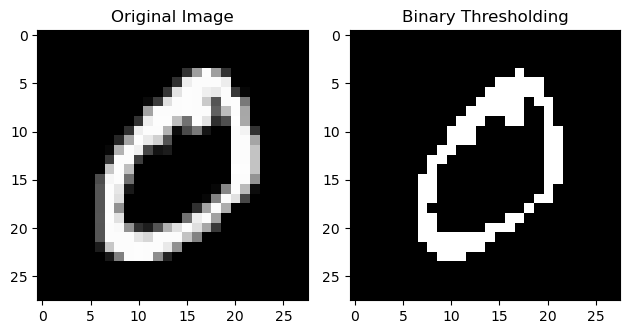

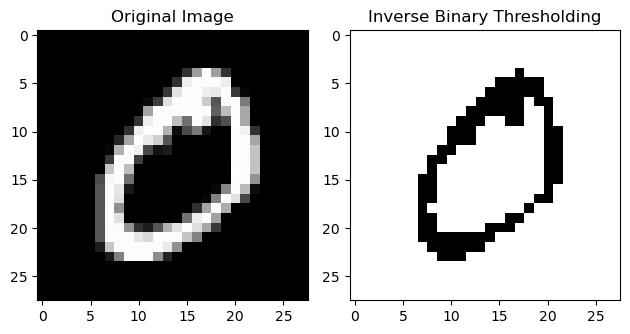

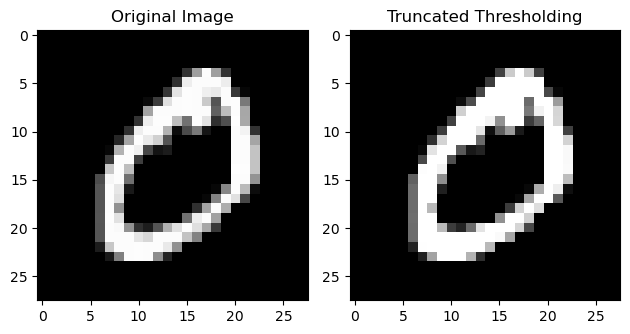

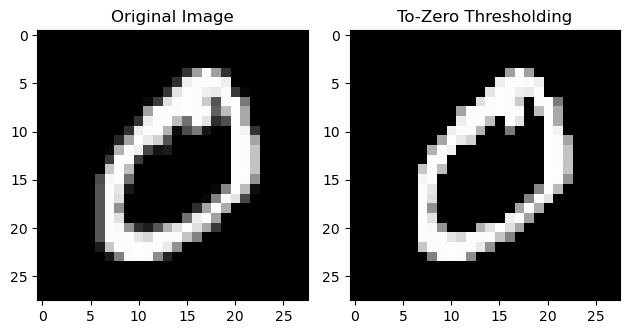

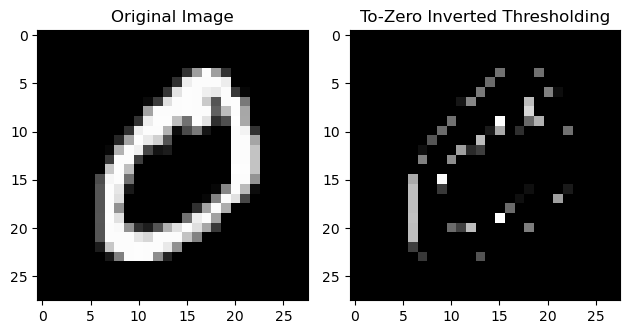

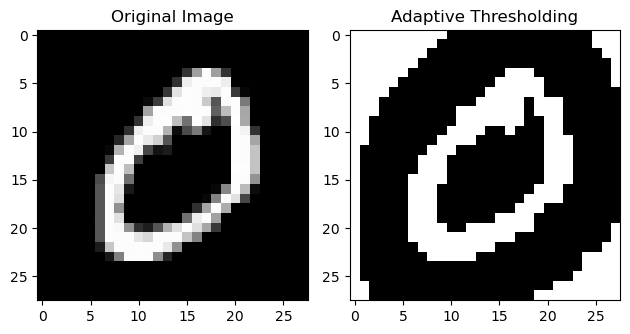

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255],
       [255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
          0, 255],
       [255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
          0, 255],
       [25

In [238]:

def binary_thresholding(grayscale_image, threshold_value=200):
    # Apply binary thresholding
    _, binary_thresholded_image = cv2.threshold(grayscale_image, threshold_value, 255, cv2.THRESH_BINARY)

    # Display the original and thresholded images
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(binary_thresholded_image, cmap='gray')
    plt.title('Binary Thresholding')

    plt.tight_layout()
    plt.show()
    return binary_thresholded_image

def inverse_binary_thresholding(grayscale_image, threshold_value=200):
    # Apply inverse binary thresholding
    _, inverse_binary_thresholded_image = cv2.threshold(grayscale_image, threshold_value, 255, cv2.THRESH_BINARY_INV)

    # Display the original and thresholded images
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(inverse_binary_thresholded_image, cmap='gray')
    plt.title('Inverse Binary Thresholding')

    plt.tight_layout()
    plt.show()
    return inverse_binary_thresholded_image

def truncated_thresholding(grayscale_image, threshold_value=200):
    # Apply truncated thresholding
    _, truncated_thresholded_image = cv2.threshold(grayscale_image, threshold_value, 255, cv2.THRESH_TRUNC)

    # Display the original and thresholded images
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(truncated_thresholded_image, cmap='gray')
    plt.title('Truncated Thresholding')

    plt.tight_layout()
    plt.show()
    return truncated_thresholded_image

def to_zero_thresholding(grayscale_image, threshold_value=120):
    # Apply to-zero thresholding
    _, to_zero_thresholded_image = cv2.threshold(grayscale_image, threshold_value, 255, cv2.THRESH_TOZERO)

    # Display the original and thresholded images
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(to_zero_thresholded_image, cmap='gray')
    plt.title('To-Zero Thresholding')

    plt.tight_layout()
    plt.show()
    return to_zero_thresholded_image

def to_zero_inverted_thresholding(grayscale_image, threshold_value=120):
    # Apply to-zero inverted thresholding
    _, to_zero_inverted_thresholded_image = cv2.threshold(grayscale_image, threshold_value, 255, cv2.THRESH_TOZERO_INV)

    # Display the original and thresholded images
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(to_zero_inverted_thresholded_image, cmap='gray')
    plt.title('To-Zero Inverted Thresholding')

    plt.tight_layout()
    plt.show()
    return to_zero_inverted_thresholded_image

def adaptive_thresholding(grayscale_image, block_size=11, constant=2):
    # Apply adaptive thresholding
    adaptive_thresholded_image = cv2.adaptiveThreshold(grayscale_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, constant)

    # Display the original and thresholded images
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(adaptive_thresholded_image, cmap='gray')
    plt.title('Adaptive Thresholding')

    plt.tight_layout()
    plt.show()
    return adaptive_thresholded_image


binary_thresholding(grayscale_image)
inverse_binary_thresholding(grayscale_image)
truncated_thresholding(grayscale_image)
to_zero_thresholding(grayscale_image)
to_zero_inverted_thresholding(grayscale_image)
adaptive_thresholding(grayscale_image)


# Object detection
- Roberts Cross, Prewitt, and Sobel operators for edge detection
- Canny edge detection

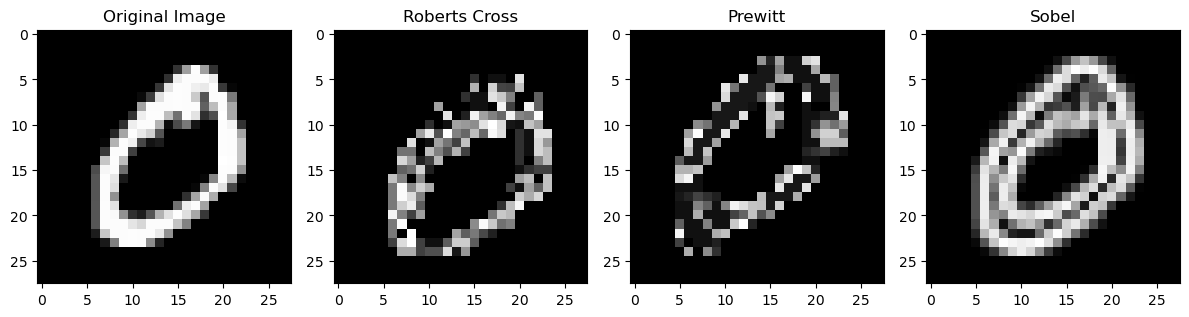

In [239]:

def apply_edge_operators(grayscale_image):
    # Roberts Cross Operator
    roberts_x = cv2.filter2D(grayscale_image, -1, np.array([[1, 0], [0, -1]], dtype=np.float32))
    roberts_y = cv2.filter2D(grayscale_image, -1, np.array([[0, 1], [-1, 0]], dtype=np.float32))
    roberts_magnitude = np.sqrt(roberts_x**2 + roberts_y**2)

    # Prewitt Operator
    prewitt_x = cv2.filter2D(grayscale_image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32))
    prewitt_y = cv2.filter2D(grayscale_image, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32))
    prewitt_magnitude = np.sqrt(prewitt_x**2 + prewitt_y**2)

    # Sobel Operator
    sobel_x = cv2.Sobel(grayscale_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(grayscale_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Display the original and edges detected using different operators
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 4, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 4, 2)
    plt.imshow(roberts_magnitude, cmap='gray')
    plt.title('Roberts Cross')

    plt.subplot(1, 4, 3)
    plt.imshow(prewitt_magnitude, cmap='gray')
    plt.title('Prewitt')

    plt.subplot(1, 4, 4)
    plt.imshow(sobel_magnitude, cmap='gray')
    plt.title('Sobel')

    plt.tight_layout()
    plt.show()

# Example usage:
apply_edge_operators(grayscale_image)


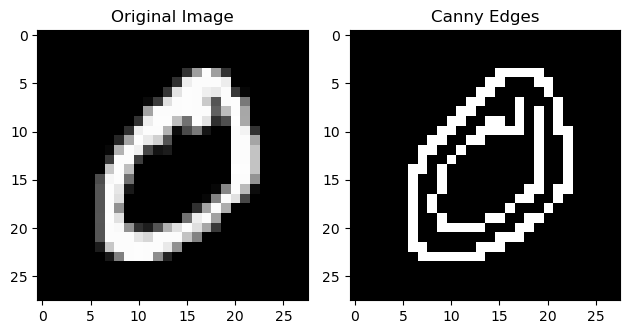

In [240]:
edges = cv2.Canny(grayscale_image, 50, 150)

# Plot original and Canny edges
plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Image')
# Canny Edges
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.tight_layout()
plt.show()

# conclusion

we tryed many combinition so we come to one good method that is 

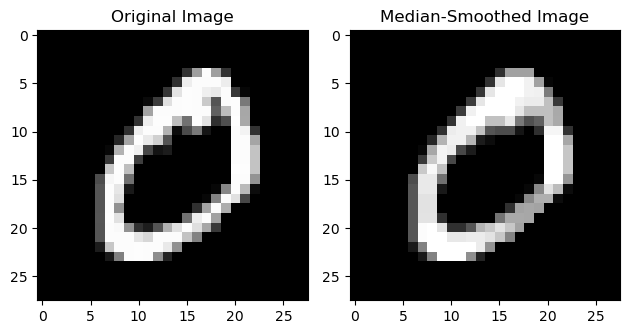

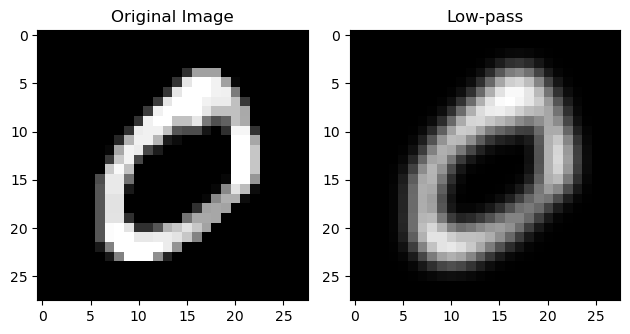

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   4,   8,   9,   7,   3,   1,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          2,  11,  28,  45,  51,  40,  21,   6,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         14,  42,  84, 119, 129, 108,  65,  25,   6,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  14,
         45,  99, 157, 195, 203, 179, 126,  64,  21,   4,   0,   0,   0,
          0,   0],
       [  

In [241]:
Low_pass(median_Filter(grayscale_image, 3))

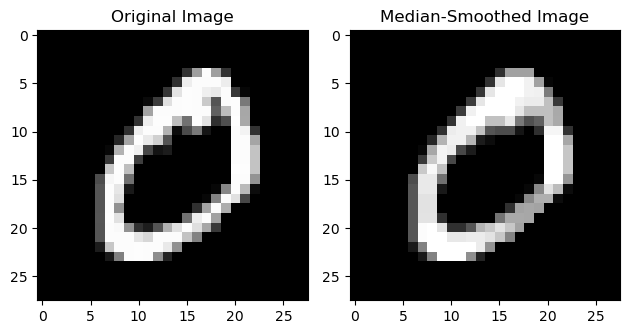

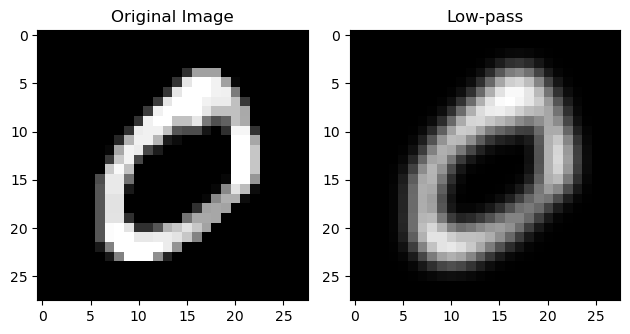

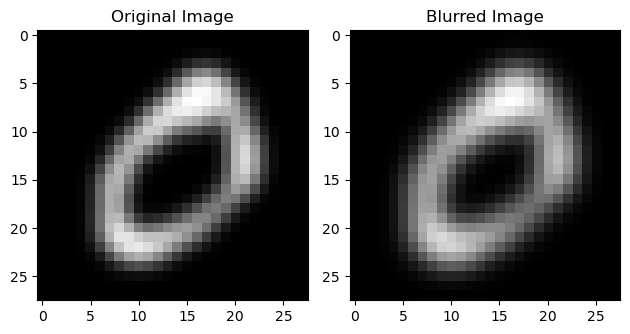

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1,   1,   1,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   3,   4,   5,   4,   2,   1,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          3,   7,  14,  19,  21,  17,  11,   5,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   4,
         11,  24,  41,  55,  58,  50,  34,  17,   7,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   4,  12,
         30,  57,  87, 110, 115, 100,  71,  40,  18,   6,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   4,  13,  32,
         63, 103, 142, 168, 172, 154, 116,  73,  36,  14,   4,   1,   0,
          0,   0],
       [  

In [242]:
restoration_Mean_Filter(Low_pass(median_Filter(grayscale_image, 3)))

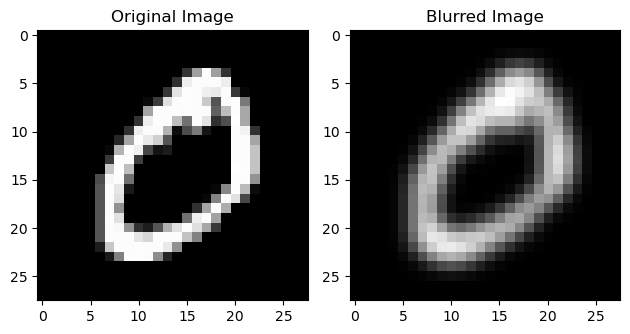

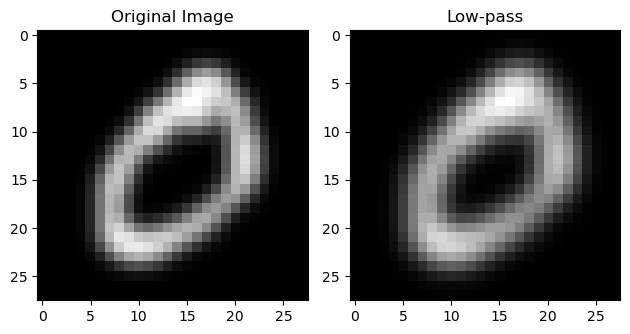

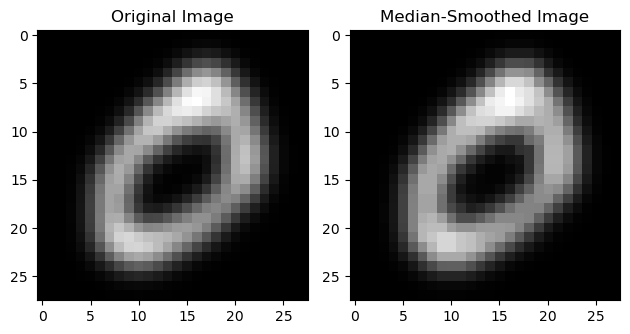

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1,   1,   1,   1,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   2,   3,   5,   5,   5,   3,   1,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          3,   8,  15,  22,  22,  22,  14,   7,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   4,
         11,  25,  44,  60,  60,  59,  41,  20,   7,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   4,  12,
         30,  58,  91, 116, 116, 111,  79,  41,  20,   6,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   5,  14,  32,
         63, 104, 144, 171, 171, 155, 112,  79,  40,  16,   4,   1,   0,
          0,   0],
       [  

In [243]:
median_Filter(Low_pass(restoration_Mean_Filter(grayscale_image)), 3)

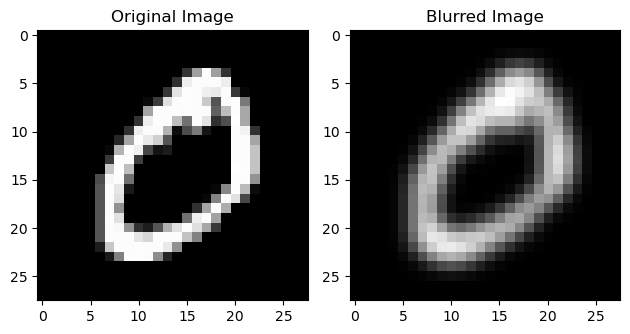

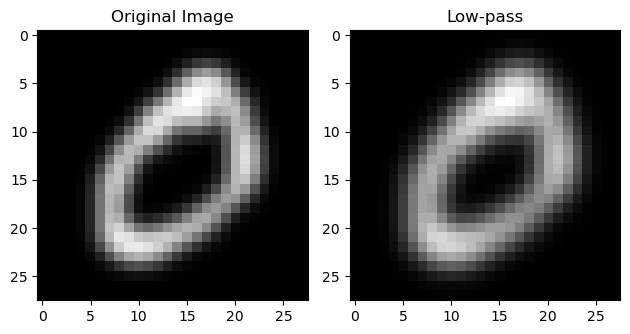

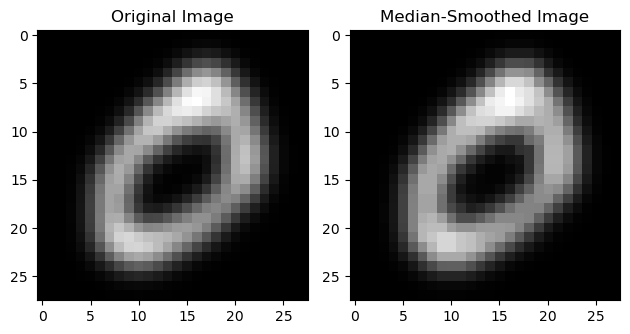

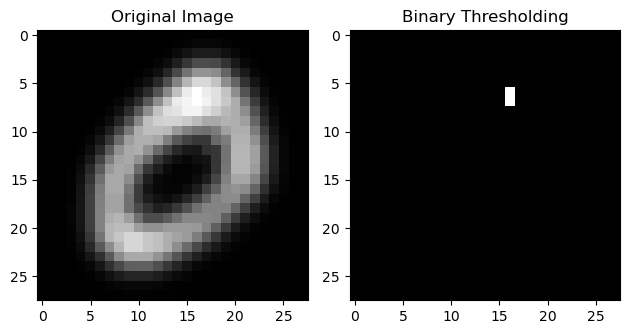

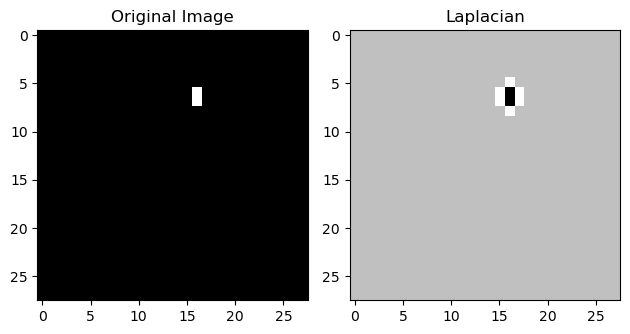

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.

In [251]:
Laplacian_Filter(binary_thresholding(median_Filter(Low_pass(restoration_Mean_Filter(grayscale_image)), 3)))

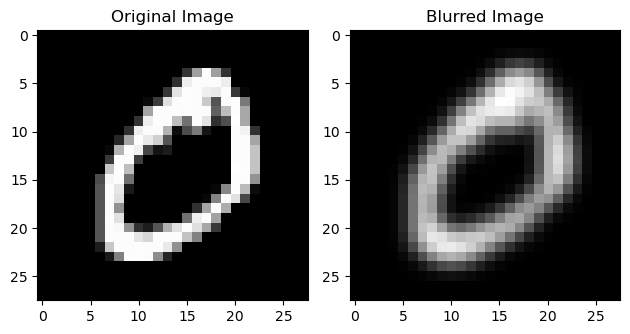

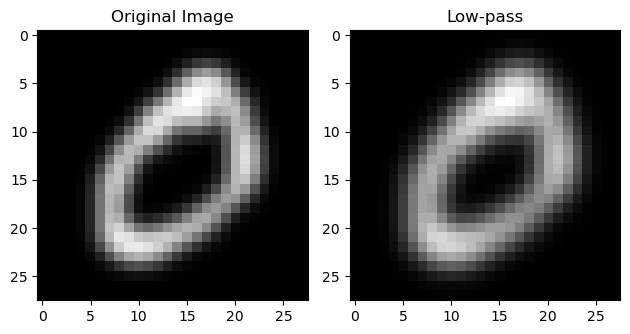

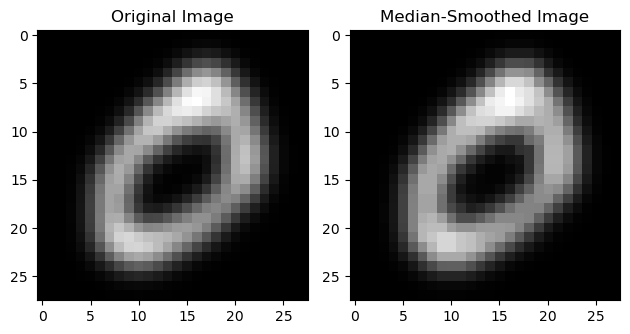

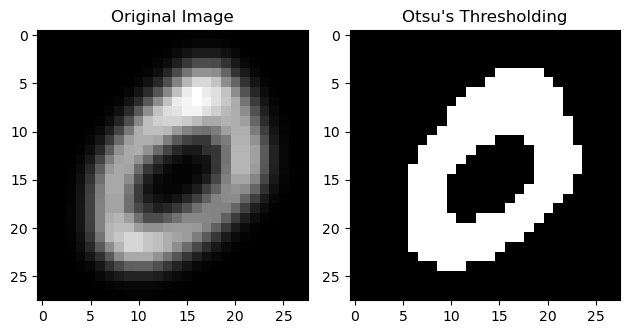

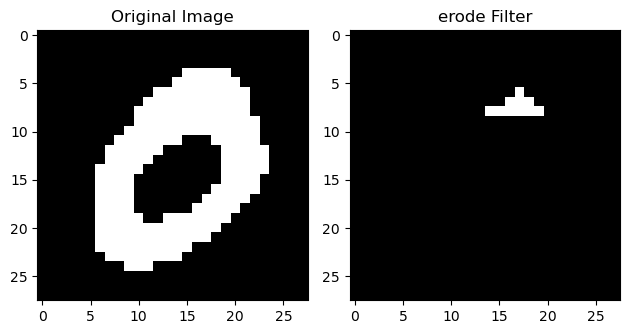

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [245]:
erode(apply_otsu_thresholding(median_Filter(Low_pass(restoration_Mean_Filter(grayscale_image)), 3)))

In [302]:


def increase_pixel_values(grayscale_image, increase_value=50, threshold=50):
    # Increase pixel values only for pixels greater than or equal to the threshold
    increased_image = np.where(grayscale_image >= threshold, cv2.add(grayscale_image, increase_value), grayscale_image)

    # Display the original and increased pixel value images
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(increased_image, cmap='gray')
    plt.title(f'Increased Pixel Values (+{increase_value} for >= {threshold})')

    plt.tight_layout()
    plt.show()
    return increased_image

# Example usage:
# increased_image = increase_pixel_values(grayscale_image)


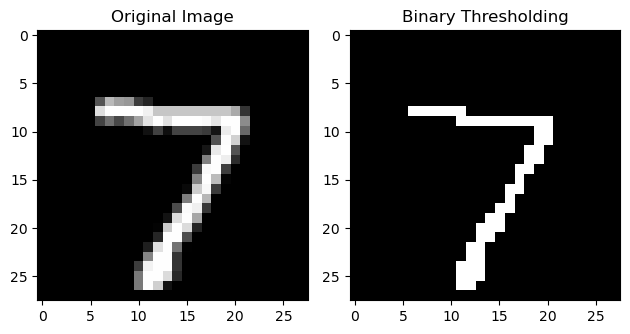

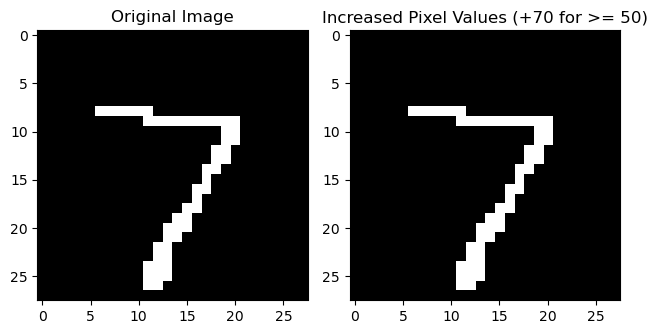

kernel =  [[0.25 0.25]
 [0.25 0.25]]


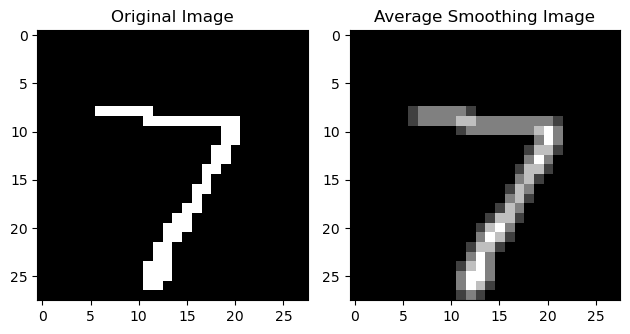

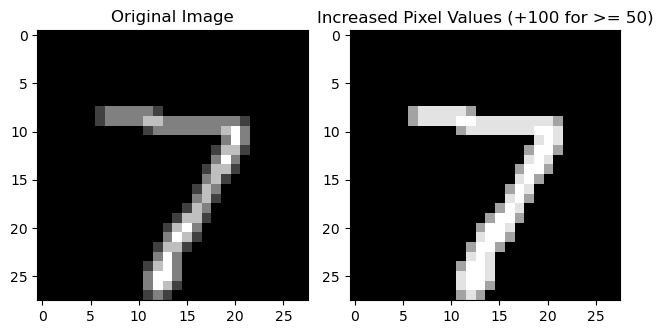

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [329]:
increase_pixel_values(Average_Filter(increase_pixel_values(binary_thresholding(x_test[0]),70,50),2),100,50)

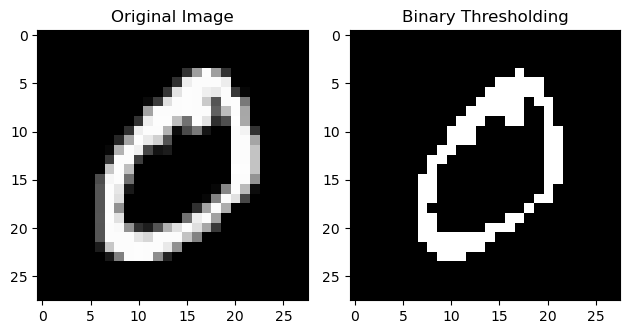

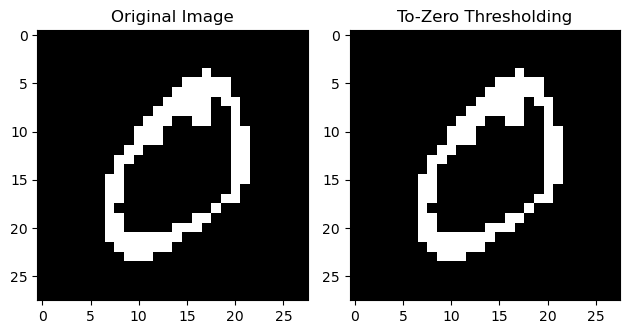

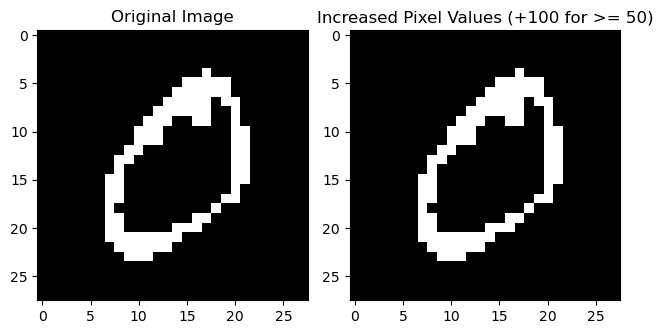

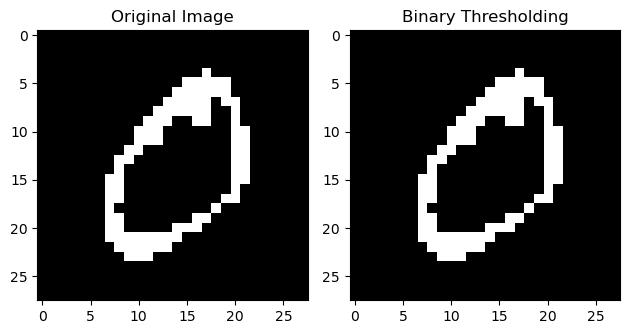

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [319]:
binary_thresholding(increase_pixel_values(to_zero_thresholding(binary_thresholding(grayscale_image) ),100,50),threshold_value=100)

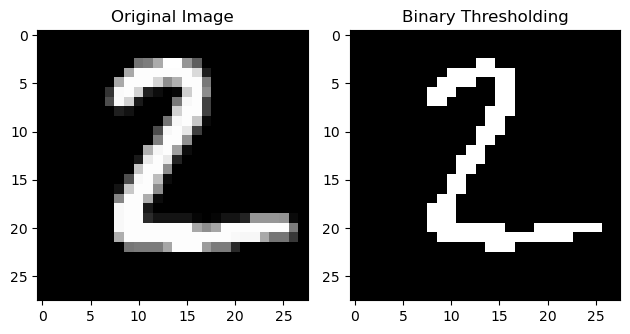

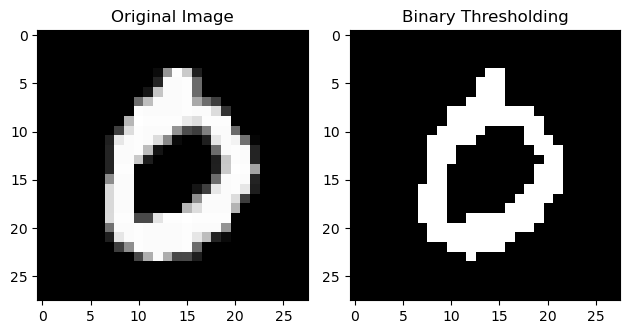

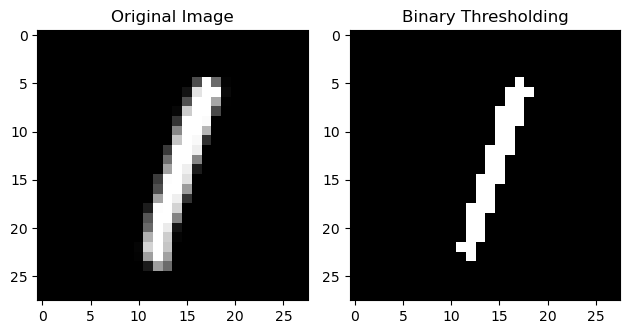

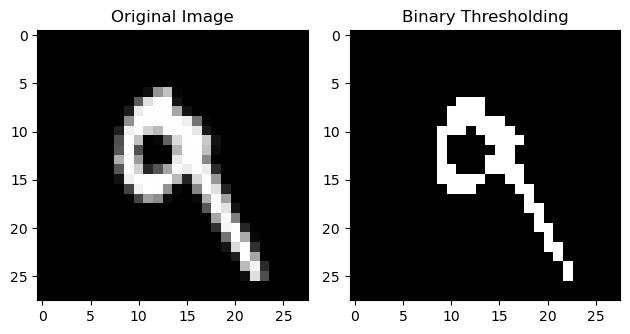

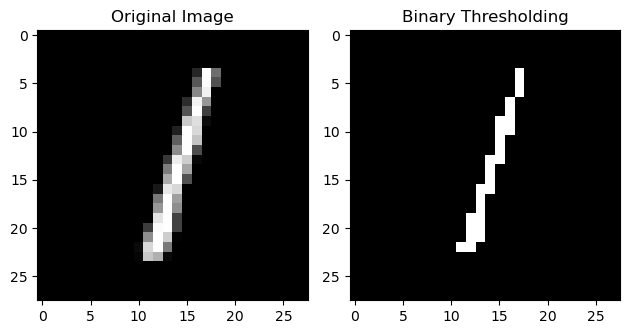

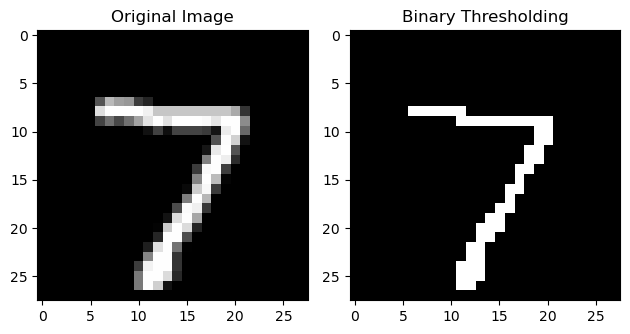

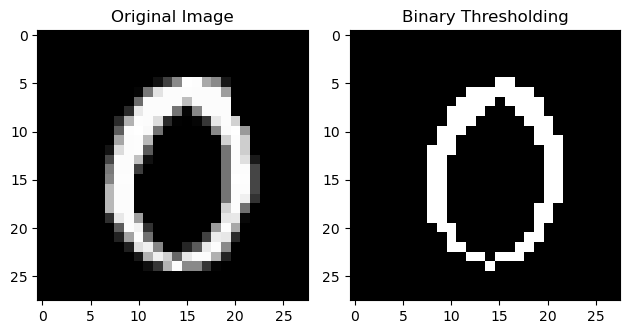

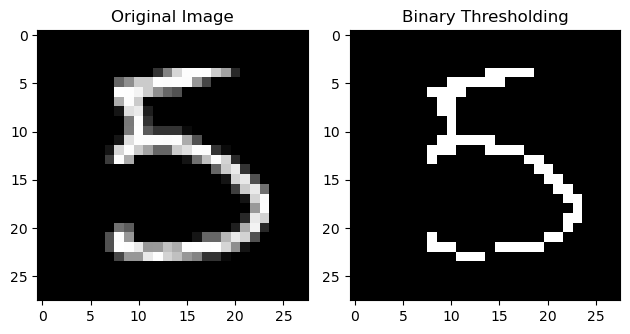

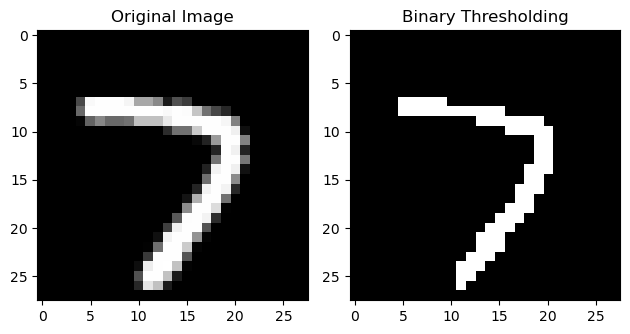

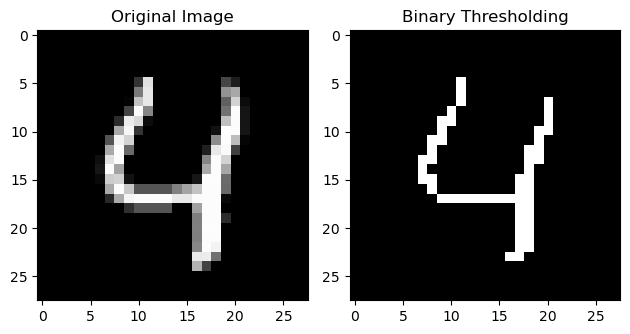

In [317]:

all_types_of_images = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]


output_folder = 'dataset'
os.makedirs(output_folder, exist_ok=True)

for i in all_types_of_images:
    
    smoothed_image = binary_thresholding(x_test[i])

    output_path = os.path.join(output_folder, f"smoothed_image_{i}.png")
    plt.imsave(output_path, smoothed_image, cmap='gray')


In [335]:

def binary_thresholding(grayscale_image, threshold_value=200):
    _, binary_thresholded_image = cv2.threshold(grayscale_image, threshold_value, 255, cv2.THRESH_BINARY)
    return binary_thresholded_image

In [336]:
def increase_pixel_values(grayscale_image, increase_value=50, threshold=50):
    increased_image = np.where(grayscale_image >= threshold, cv2.add(grayscale_image, increase_value), grayscale_image)
    return increased_image


In [337]:
def Average_Filter(grayscale_image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    smoothed_image = cv2.filter2D(grayscale_image, -1, kernel)
    return smoothed_image

In [339]:

all_types_of_images = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]

def binary_thresholding(grayscale_image, threshold_value=200):
    _, binary_thresholded_image = cv2.threshold(grayscale_image, threshold_value, 255, cv2.THRESH_BINARY)
    return binary_thresholded_image

def increase_pixel_values(grayscale_image, increase_value=50, threshold=50):
    increased_image = np.where(grayscale_image >= threshold, cv2.add(grayscale_image, increase_value), grayscale_image)
    return increased_image

def Average_Filter(grayscale_image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    smoothed_image = cv2.filter2D(grayscale_image, -1, kernel)
    return smoothed_image

output_folder = 'Pre-Processed'
os.makedirs(output_folder, exist_ok=True)

for i in range(len(all_types_of_images)):
    
    smoothed_image = increase_pixel_values(Average_Filter(increase_pixel_values(binary_thresholding(x_test[all_types_of_images[i]]),70,50),2),100,50) 

    output_path = os.path.join(output_folder, f"image{i}.png")
    plt.imsave(output_path, smoothed_image, cmap='gray')

In [ ]:


all_types_of_images = [1,3,5,7,2,0,13,15,17,4]

def binary_thresholding(grayscale_image, threshold_value=200):
    _, binary_thresholded_image = cv2.threshold(grayscale_image, threshold_value, 255, cv2.THRESH_BINARY)
    return binary_thresholded_image

def increase_pixel_values(grayscale_image, increase_value=50, threshold=50):
    increased_image = np.where(grayscale_image >= threshold, cv2.add(grayscale_image, increase_value), grayscale_image)
    return increased_image

def Average_Filter(grayscale_image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    smoothed_image = cv2.filter2D(grayscale_image, -1, kernel)
    return smoothed_image

output_folder = 'Pre-Processed_test'
os.makedirs(output_folder, exist_ok=True)

plt.figure(figsize=(15, 6))

for i in range(len(all_types_of_images)):
    original_image = x_test[i]
    
    # Processing steps
    binary_thresholded_image = binary_thresholding(original_image)
    increased_pixel_image = increase_pixel_values(binary_thresholded_image, 70, 50)
    averaged_image = Average_Filter(increased_pixel_image, 2)
    smoothed_image = increase_pixel_values(averaged_image, 100, 50)

    # Save the processed image
    output_path = os.path.join(output_folder, f"image{i}.png")
    plt.imsave(output_path, smoothed_image, cmap='gray')

    # Display the processed image
    plt.subplot(2, 5, i + 1)
    plt.imshow(smoothed_image, cmap='gray')
    plt.title(f"Processed Image {i}")

plt.tight_layout()
plt.show()


In [350]:
def binary_thresholding(grayscale_image, threshold_value=200):
    _, binary_thresholded_image = cv2.threshold(grayscale_image, threshold_value, 255, cv2.THRESH_BINARY)
    return binary_thresholded_image

def increase_pixel_values(grayscale_image, increase_value=50, threshold=50):
    increased_image = np.where(grayscale_image >= threshold, cv2.add(grayscale_image, increase_value), grayscale_image)
    return increased_image

def Average_Filter(grayscale_image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    smoothed_image = cv2.filter2D(grayscale_image, -1, kernel)
    return smoothed_image

output_folder = 'Pre-Processed'
os.makedirs(output_folder, exist_ok=True)


for i in range(1000):
    original_image = x_test[i]
    
    # Processing steps
    binary_thresholded_image = binary_thresholding(original_image)
    increased_pixel_image = increase_pixel_values(binary_thresholded_image, 70, 50)
    averaged_image = Average_Filter(increased_pixel_image, 2)
    smoothed_image = increase_pixel_values(averaged_image, 100, 50)

    # Save the processed image
    output_path = os.path.join(output_folder, f"image{i}.png")
    plt.imsave(output_path, smoothed_image, cmap='gray')
